In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import math

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5666864,County,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3275S,14/03/2012 01:12:07 PM,14/03/2012 01:13:22 PM,75,1P MTR M-F 9:30-19:30,0,894,1893
7729257,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2864,18/05/2012 01:02:20 PM,18/05/2012 01:23:17 PM,1257,1P MTR M-SAT 7:30-19:30,0,894,5346
10099656,Queensberry,VICTORIA STREET,KING STREET,HAWKE STREET,3,7640N,28/07/2012 12:27:49 PM,28/07/2012 12:30:00 PM,131,2P TKT A SAT 7:30-12:30,0,1381,3983
11019675,County,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3206N,25/08/2012 08:40:28 AM,25/08/2012 08:43:21 AM,173,1P MTR SAT 7:30-19:30,0,894,1909
8854431,Supreme,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3092,21/06/2012 02:12:07 PM,21/06/2012 02:17:17 PM,310,1P MTR M-SAT 7:30-19:30,0,894,5605


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
595808,The Mac,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5995S,18/10/2011 12:20:58 PM,18/10/2011 12:23:28 PM,150,1P MTR M-SAT 7:30-19:30,0,5,2439
10483911,Titles,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,4,3871S,09/08/2012 10:29:44 AM,09/08/2012 01:21:47 PM,10323,2P MTR M-F 9:30-20:30,1,856,2208
2344298,Princes Theatre,Lt BOURKE STREET,EXHIBITION STREET,SPRING STREET,3,2508N,05/12/2011 09:04:23 AM,05/12/2011 09:40:41 AM,2178,1/2P MTR M-SAT 7:30-19:30,1,907,1333
12025721,Victoria Market,QUEEN STREET,VICTORIA STREET,THERRY STREET,5,4963W,25/09/2012 09:42:11 AM,25/09/2012 10:30:45 AM,2914,1P MTR M-SAT 6:00-19:30,0,1171,3104
12141501,Regency,EXHIBITION STREET,Lt LONSDALE STREET,LONSDALE STREET,5,553W,28/09/2012 09:59:18 AM,28/09/2012 10:00:38 AM,80,2P MTR M-SAT 7:30-20:30,0,647,193


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1032
Victoria Market     717
Princes Theatre     681
Regency             627
Southbank           613
Hyatt               610
The Mac             602
Titles              572
Rialto              464
Hardware            429
County              423
City Square         421
Chinatown           419
Courtney            394
Magistrates         382
Spencer             365
Banks               350
RACV                322
Jolimont            298
Supreme             180
Docklands            50
Tavistock            47
West Melbourne        2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5666864,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3275S,14/03/2012 01:12:07 PM,14/03/2012 01:13:22 PM,75,1P MTR M-F 9:30-19:30,0,894,1893
7729257,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2864,18/05/2012 01:02:20 PM,18/05/2012 01:23:17 PM,1257,1P MTR M-SAT 7:30-19:30,0,894,5346
10099656,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7640N,28/07/2012 12:27:49 PM,28/07/2012 12:30:00 PM,131,2P TKT A SAT 7:30-12:30,0,1381,3983
11019675,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3206N,25/08/2012 08:40:28 AM,25/08/2012 08:43:21 AM,173,1P MTR SAT 7:30-19:30,0,894,1909
8854431,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3092,21/06/2012 02:12:07 PM,21/06/2012 02:17:17 PM,310,1P MTR M-SAT 7:30-19:30,0,894,5605


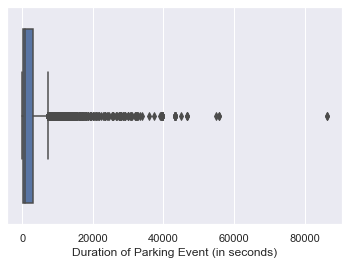

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             966
QUEEN STREET                784
LA TROBE STREET             604
EXHIBITION STREET           542
COLLINS STREET              521
FRANKLIN STREET             510
ELIZABETH STREET            510
RUSSELL STREET              463
BOURKE STREET               428
LT LONSDALE STREET          353
LT COLLINS STREET           291
SPRING STREET               279
FLINDERS LANE               274
KING STREET                 250
ERROL STREET                232
WILLIAM STREET              214
A'BECKETT STREET            166
LT BOURKE STREET            159
COVENTRY STREET             148
FLINDERS STREET             146
VICTORIA STREET             145
SPENCER STREET              121
CAPEL STREET                111
DORCAS STREET               110
QUEENSBERRY STREET          109
THERRY STREET               108
ALBERT STREET               101
KAVANAGH STREET              85
O'CONNELL STREET             80
COBDEN STREET                80
LEVESON STREET               77
GRANT ST

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            937
QUEEN STREET           803
WILLIAM STREET         647
QUEENSBERRY STREET     641
RUSSELL STREET         515
SPENCER STREET         488
EXHIBITION STREET      487
LT LONSDALE STREET     447
SWANSTON STREET        445
LONSDALE STREET        380
LT COLLINS STREET      349
VICTORIA STREET        308
COLLINS STREET         276
ELIZABETH STREET       275
BOURKE STREET          254
LT BOURKE STREET       248
FLINDERS LANE          197
THERRY STREET          165
LA TROBE STREET        159
A'BECKETT STREET       141
WILLAM STREET          138
FRANKLIN STREET        120
WELLS STREET           117
FLINDERS STREET        102
DODDS STREET           100
O'CONNELL STREET        93
SOUTHBANK BOULEVARD     89
KINGS WAY               87
ERROL STREET            78
BALSTON STREET          70
STURT STREET            68
COBDEN STREET           58
PEEL STREET             55
VICTORIA PARADE         53
GISBORNE STREET         52
PELHAM STREET           50
ALBERT STREET           50
H

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        908
ELIZABETH STREET      824
VICTORIA STREET       797
QUEEN STREET          772
EXHIBITION STREET     503
SPRING STREET         494
KING STREET           488
LONSDALE STREET       474
RUSSELL STREET        382
LT BOURKE STREET      380
FLINDERS LANE         378
COLLINS STREET        349
SWANSTON STREET       275
LT COLLINS STREET     254
BOURKE STREET         248
LA TROBE STREET       241
FLINDERS STREET       197
LT LONSDALE STREET    185
FRANKLIN STREET       165
DODDS STREET          134
ST KILDA ROAD         117
LANSDOWNE STREET       87
POWER STREET           83
QUEENSBERRY STREET     81
LEVESON STREET         78
WELLS STREET           75
THERRY STREET          73
WALSH STREET           69
A'BECKETT STREET       67
ELM STREET             55
HAWKE STREET           50
GISBORNE STREET        47
STURT STREET           43
MILES STREET           42
CAPEL STREET           41
STANLEY STREET         36
MILTON STREET          36
KAVANAGH STREET        33
DUDLEY STREE

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5666864,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3275S,2012-03-14 13:12:07,2012-03-14 13:13:22,75,1P MTR M-F 9:30-19:30,0,894,1893
7729257,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2864,2012-05-18 13:02:20,2012-05-18 13:23:17,1257,1P MTR M-SAT 7:30-19:30,0,894,5346
10099656,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7640N,2012-07-28 12:27:49,2012-07-28 12:30:00,131,2P TKT A SAT 7:30-12:30,0,1381,3983
11019675,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3206N,2012-08-25 08:40:28,2012-08-25 08:43:21,173,1P MTR SAT 7:30-19:30,0,894,1909
8854431,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3092,2012-06-21 14:12:07,2012-06-21 14:17:17,310,1P MTR M-SAT 7:30-19:30,0,894,5605


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
595808,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5995S,2011-10-18 12:20:58,2011-10-18 12:23:28,150,1P MTR M-SAT 7:30-19:30,0,5,2439
10483911,TITLES,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,4,3871S,2012-09-08 10:29:44,2012-09-08 13:21:47,10323,2P MTR M-F 9:30-20:30,1,856,2208
2344298,PRINCES THEATRE,LT BOURKE STREET,EXHIBITION STREET,SPRING STREET,3,2508N,2011-05-12 09:04:23,2011-05-12 09:40:41,2178,1/2P MTR M-SAT 7:30-19:30,1,907,1333
12025721,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,5,4963W,2012-09-25 09:42:11,2012-09-25 10:30:45,2914,1P MTR M-SAT 6:00-19:30,0,1171,3104
12141501,REGENCY,EXHIBITION STREET,LT LONSDALE STREET,LONSDALE STREET,5,553W,2012-09-28 09:59:18,2012-09-28 10:00:38,80,2P MTR M-SAT 7:30-20:30,0,647,193


### KNN Classification Model on Predicitive Analytics question 2

In [19]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 47
Maximum parking duration (seconds): 86242

Minimum parking duration (hour): 0.013055555555555556
Maximum parking duration (hour): 23.95611111111111

Minimum parking duration is under [1] hours
Maximum parking duration is under [24] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    1
9    1
Name: Duration (Hours), dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour
5666864,0,0,0,0,0,0,4,894,1893,13
7729257,1,0,1,1,1,0,1,894,5346,13
10099656,2,1,0,2,2,0,3,1381,3983,12
11019675,0,0,0,0,3,0,3,894,1909,8
8854431,3,0,2,3,1,0,1,894,5605,14
3888646,2,2,3,4,4,0,2,641,3124,17
6808367,4,3,4,5,5,0,2,1288,69,12
790332,5,4,5,6,6,0,4,856,2249,10
10456990,6,5,6,7,7,0,5,1221,6971,13
1784974,2,1,7,8,8,0,4,1381,3996,10


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 45.1min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 9
Best weights: uniform
Best algorithm: ball_tree
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.6999
1,auto,10,1,1,distance,0.6999
2,auto,10,1,2,uniform,0.6901
3,auto,10,1,2,distance,0.6901
4,auto,10,1,5,uniform,0.6877
5,auto,10,1,5,distance,0.6877
6,auto,10,2,1,uniform,0.7735
7,auto,10,2,1,distance,0.7063
8,auto,10,2,2,uniform,0.7710
9,auto,10,2,2,distance,0.6926


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.786
Score with 2 selected features: 0.7995
Score with 3 selected features: 0.8165

Indexs of the desired features
[2, 9, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Arrival Hour,In Violation?
5666864,0,13,0
7729257,1,13,0
10099656,0,12,0
11019675,0,8,0
8854431,2,14,0
3888646,3,17,0
6808367,4,12,0
790332,5,10,0
10456990,6,13,0
1784974,7,10,0


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 22.2min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 9
Best weights: distance
Best algorithm: ball_tree
Best leaf_size: 20
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7469
1,auto,10,1,1,distance,0.7469
2,auto,10,1,2,uniform,0.7465
3,auto,10,1,2,distance,0.7465
4,auto,10,1,5,uniform,0.7465
5,auto,10,1,5,distance,0.7465
6,auto,10,2,1,uniform,0.8019
7,auto,10,2,1,distance,0.8012
8,auto,10,2,2,uniform,0.8019
9,auto,10,2,2,distance,0.8007


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[3867  109   16    2    0    0    0    0    1    0    1    0    0    0
     0]
 [ 484  153   17    5    1    3    0    0    1    0    5    2    0    0
     0]
 [  97   50   22    2    1    1    0    1    2    0    3    0    0    0
     0]
 [  31   15    5    0    0    0    0    0    0    0    0    1    0    0
     0]
 [  12    9    3    1    0    0    0    0    1    0    3    1    0    0
     0]
 [   3   11    1    0    0    0    0    0    0    0    1    0    0    0
     0]
 [   3    3    1    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   4    2    0    1    0    0    0    0    1    0    0    1    0    0
     0]
 [   2    2    1    0    0    0    0    0    0    0    3    0    0    0
     0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   2    2    1    0    0    0    0    1    0    0    8    0    0    0
     0]
 [   2    7    0    0    0    1    0    0    0    0    0    0    0    0
     0]
 [   2    0    1    0  

In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.80500
[fold 1] score: 0.82300
[fold 2] score: 0.81350
[fold 3] score: 0.81800
[fold 4] score: 0.80800

KNN mean score [5 folds] = 0.8135
